In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
sns.set_style("whitegrid")

# Load the dataset from the CSV file
file_path = 'index_1.csv'
df = pd.read_csv(file_path)

# --- Initial Data Inspection ---

# Display the first 5 rows to see the data structure
print("--- First 5 Rows ---")
print(df.head())

# Get a concise summary of the DataFrame (dtypes, non-null counts)
print("\n--- DataFrame Info ---")
df.info()

# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics (Numerical) ---")
print(df.describe())

# Get descriptive statistics for categorical columns
print("\n--- Descriptive Statistics (Categorical) ---")
print(df.describe(include=['object']))

--- First 5 Rows ---
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4

In [2]:
# --- 1. Data Cleaning and Feature Engineering ---

# Convert 'datetime' and 'date' columns to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])

# Extract new time-based features
df['hour'] = df['datetime'].dt.hour
df['day_of_week_name'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()

# --- Investigate Missing Values ---

# Check unique values in 'cash_type'
print(f"\nUnique values in 'cash_type': {df['cash_type'].unique()}")

# Check where 'card' is missing
# We can see that the 89 missing 'card' values are all from 'cash' transactions
print("\nPayment type for rows where 'card' is missing:")
print(df[df['card'].isnull()]['cash_type'].value_counts())

# Check for duplicate rows
duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicates_count}")

# Display the DataFrame with new features
print("\n--- Top 5 Rows After Feature Engineering ---")
print(df.head())


Unique values in 'cash_type': ['card' 'cash']

Payment type for rows where 'card' is missing:
cash_type
cash    89
Name: count, dtype: int64

Number of duplicate rows found: 0

--- Top 5 Rows After Feature Engineering ---
        date                datetime cash_type                 card  money  \
0 2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1 2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2 2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3 2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4 2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  hour day_of_week_name  month  
0          Latte    10           Friday  March  
1  Hot Chocolate    12           Friday  March  
2  Hot Chocolate    12           Friday  March  
3      Americano    13           Friday  March  
4          Latte    13           Friday  March  


d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


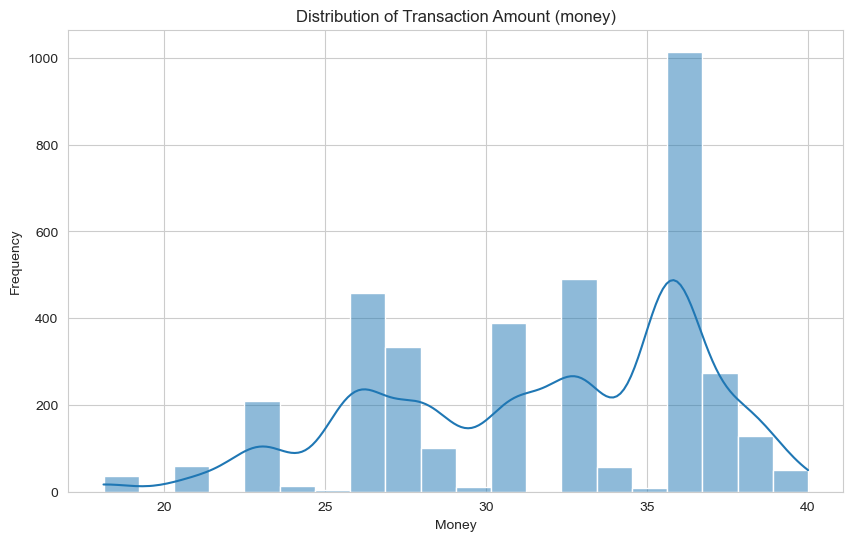

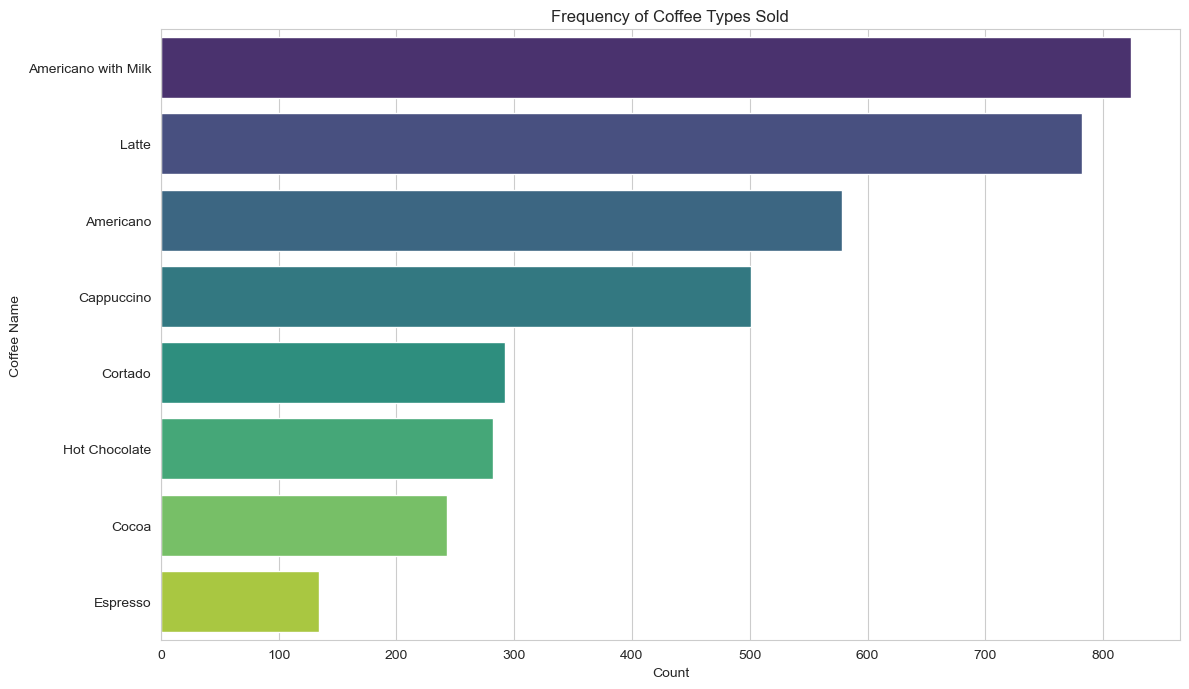

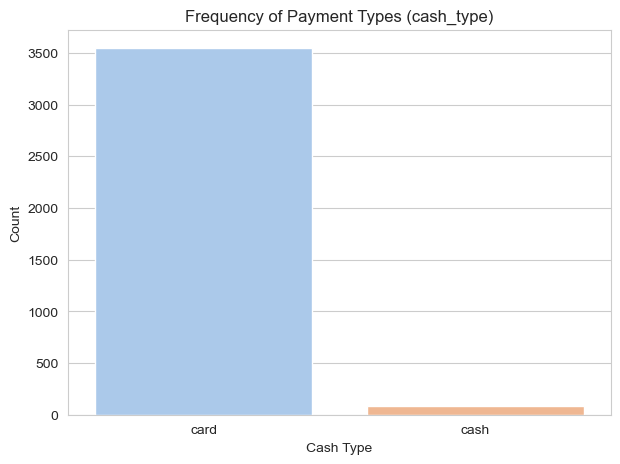

In [3]:
# --- 2. Univariate Analysis ---

# Plot 1: Distribution of 'money' (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['money'], bins=20, kde=True)
plt.title('Distribution of Transaction Amount (money)') # English comment
plt.xlabel('Money') # English comment
plt.ylabel('Frequency') # English comment
plt.savefig('money_distribution.png')

# Plot 2: Frequency of 'coffee_name'
plt.figure(figsize=(12, 7))
# Sort bars by frequency for better readability
coffee_order = df['coffee_name'].value_counts().index
sns.countplot(y='coffee_name', data=df, order=coffee_order, palette='viridis')
plt.title('Frequency of Coffee Types Sold') # English comment
plt.xlabel('Count') # English comment
plt.ylabel('Coffee Name') # English comment
plt.tight_layout()
plt.savefig('coffee_name_frequency.png')

# Plot 3: Frequency of 'cash_type'
plt.figure(figsize=(7, 5))
sns.countplot(x='cash_type', data=df, palette='pastel')
plt.title('Frequency of Payment Types (cash_type)') # English comment
plt.xlabel('Cash Type') # English comment
plt.ylabel('Count') # English comment
plt.savefig('cash_type_frequency.png')

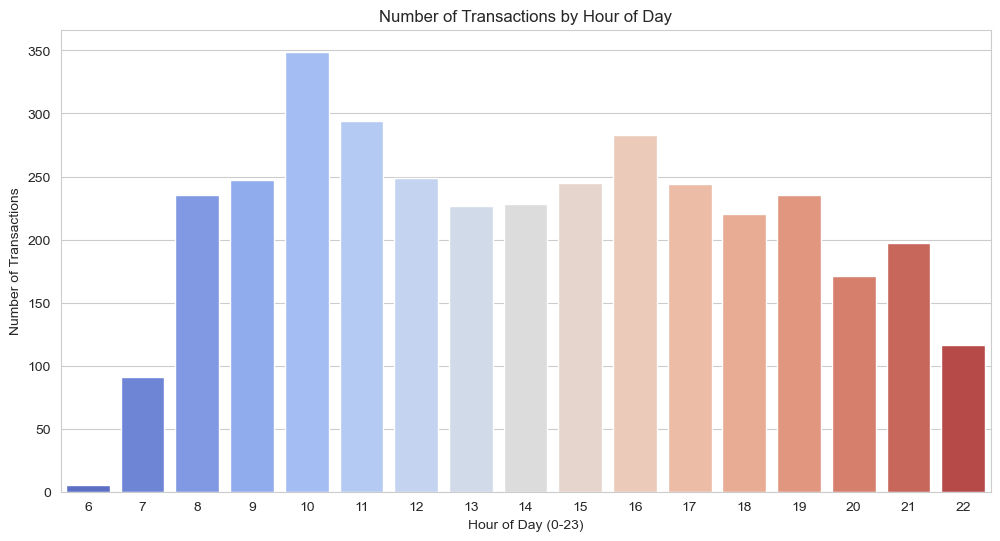

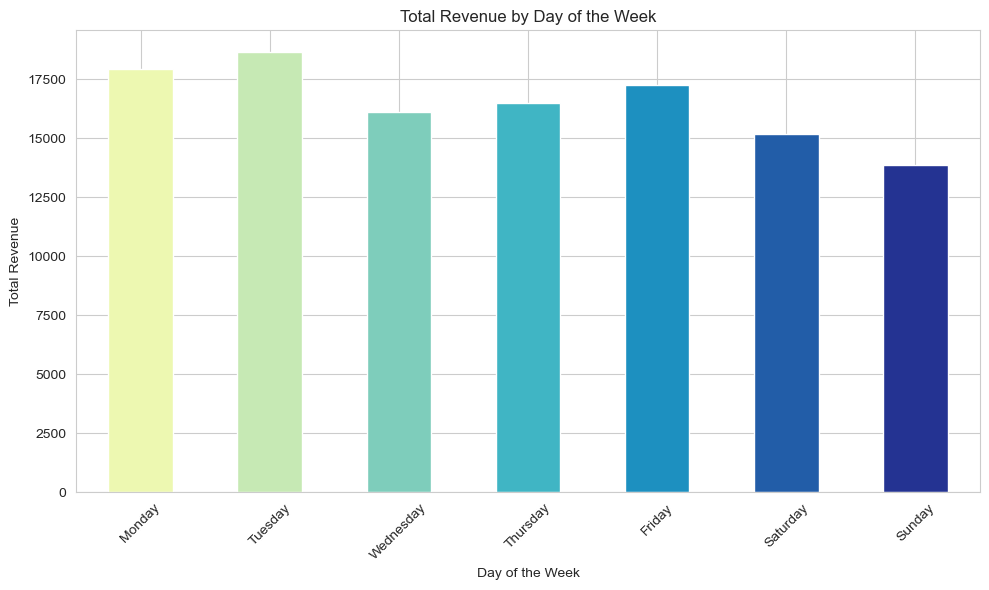

In [4]:
# --- 3. Time Series Analysis ---

# Plot 4: Number of Sales by Hour of Day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title('Number of Transactions by Hour of Day') # English comment
plt.xlabel('Hour of Day (0-23)') # English comment
plt.ylabel('Number of Transactions') # English comment
plt.savefig('sales_by_hour.png')

# Plot 5: Total Sales (Revenue) by Day of Week
# Order the days of the week logically
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = df.groupby('day_of_week_name')['money'].sum().reindex(day_order)

plt.figure(figsize=(10, 6))
daily_revenue.plot(kind='bar', color=sns.color_palette('YlGnBu', 7))
plt.title('Total Revenue by Day of the Week') # English comment
plt.xlabel('Day of the Week') # English comment
plt.ylabel('Total Revenue') # English comment
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.tight_layout()
plt.savefig('revenue_by_day_of_week.png')

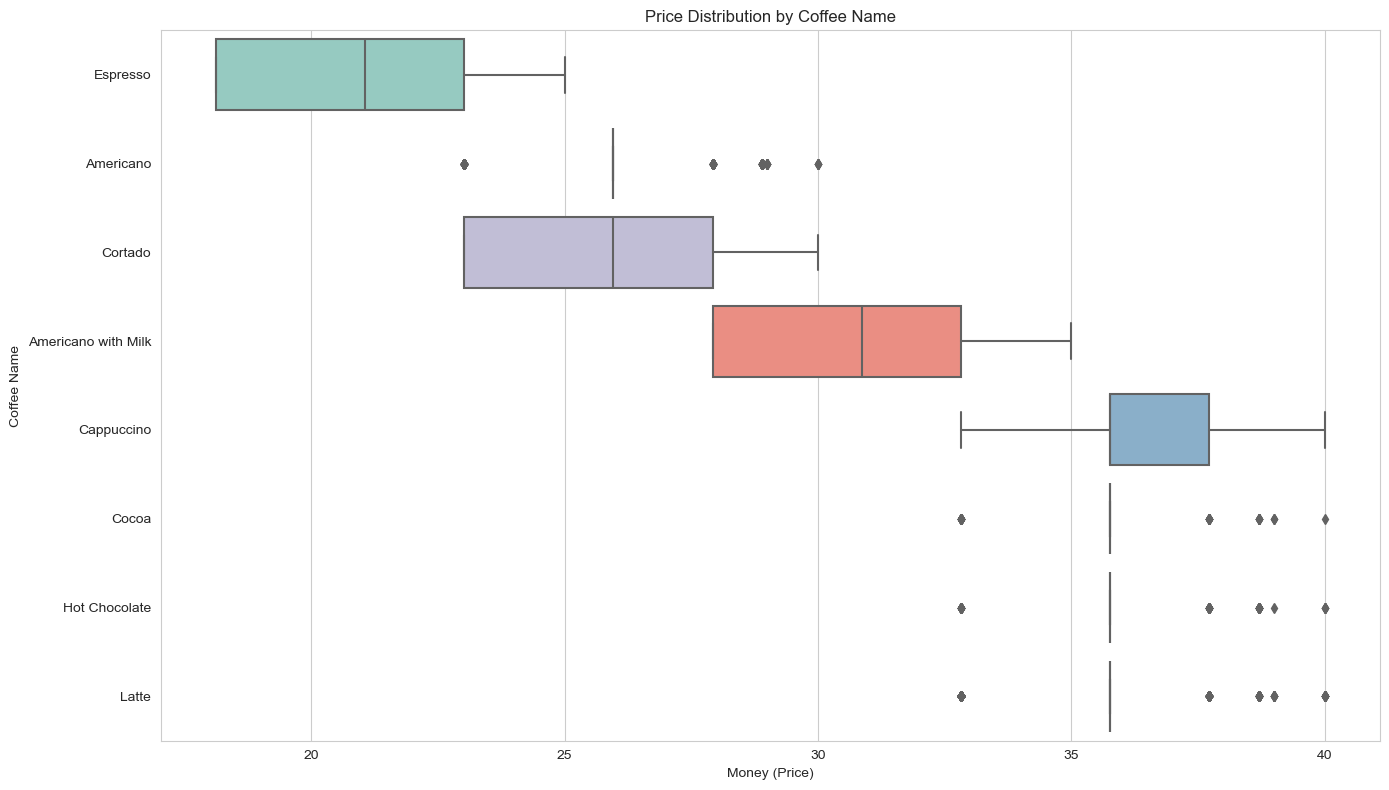

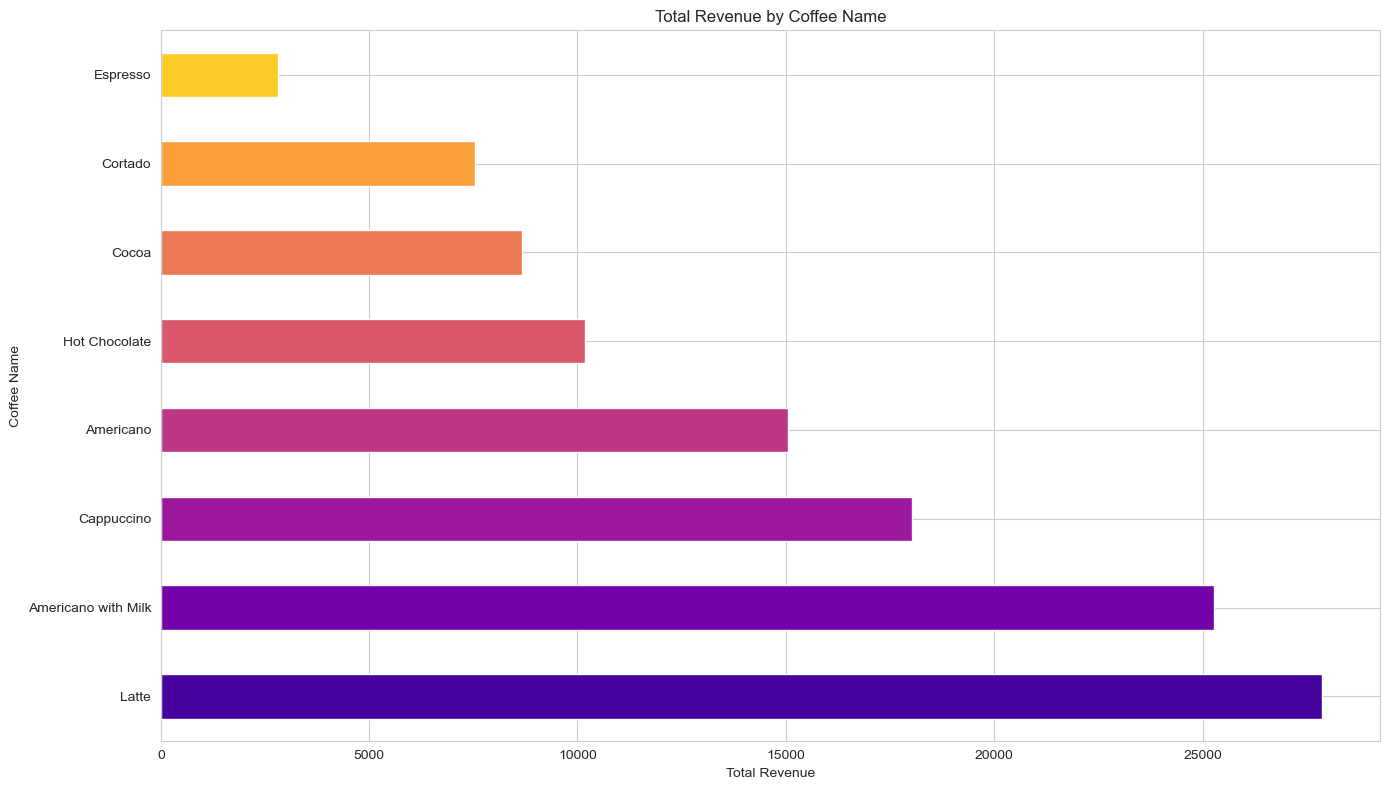

In [5]:
# --- 4. Bivariate Analysis ---

# Plot 8: Price Distribution by Coffee Name (Boxplot)
plt.figure(figsize=(14, 8))
# Sort by median price
price_order = df.groupby('coffee_name')['money'].median().sort_values().index
sns.boxplot(x='money', y='coffee_name', data=df, order=price_order, palette='Set3')
plt.title('Price Distribution by Coffee Name') # English comment
plt.xlabel('Money (Price)') # English comment
plt.ylabel('Coffee Name') # English comment
plt.tight_layout()
plt.savefig('price_by_coffee_name_boxplot.png')

# Plot 9: Total Revenue by Coffee Name (Bar Chart)
plt.figure(figsize=(14, 8))
# Calculate total revenue and sort
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
revenue_by_coffee.plot(kind='barh', color=sns.color_palette('plasma', len(revenue_by_coffee)))
plt.title('Total Revenue by Coffee Name') # English comment
plt.xlabel('Total Revenue') # English comment
plt.ylabel('Coffee Name') # English comment
plt.tight_layout()
plt.savefig('revenue_by_coffee_name.png')